# Load the dataset and Cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
# dropping id column
df.drop('id', axis = 1, inplace = True)
# rename column names to make it more user-friendly

df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

'packed_cell_volume', 'white_blood_cell_count' and 'red_blood_cell_count' are object type. We need to change them to numerical dtype.

In [ ]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [ ]:
df.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [ ]:
df.isnull().sum()

,0
age,9
blood_pressure,12
specific_gravity,47
albumin,46
sugar,49
red_blood_cells,152
pus_cell,65
pus_cell_clumps,4
bacteria,4
blood_glucose_random,44


In [ ]:
# Extracting categorical and numerical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns:', cat_cols)
print('Numerical columns:', num_cols)

Categorical columns: ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'aanemia', 'class']
Numerical columns: ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


In [ ]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



We have to clean the dataset by removing the ambiguous values

In [ ]:
# replace incorrect values
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace({'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace('\tno', 'no')
df['class'] = df['class'].replace({'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [ ]:
# convert class labels to numbers
df['class'] = df['class'].map({'ckd': 1, 'not ckd': 0})

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has [1 0] values



# Exploratory Data Analysis (EDA)

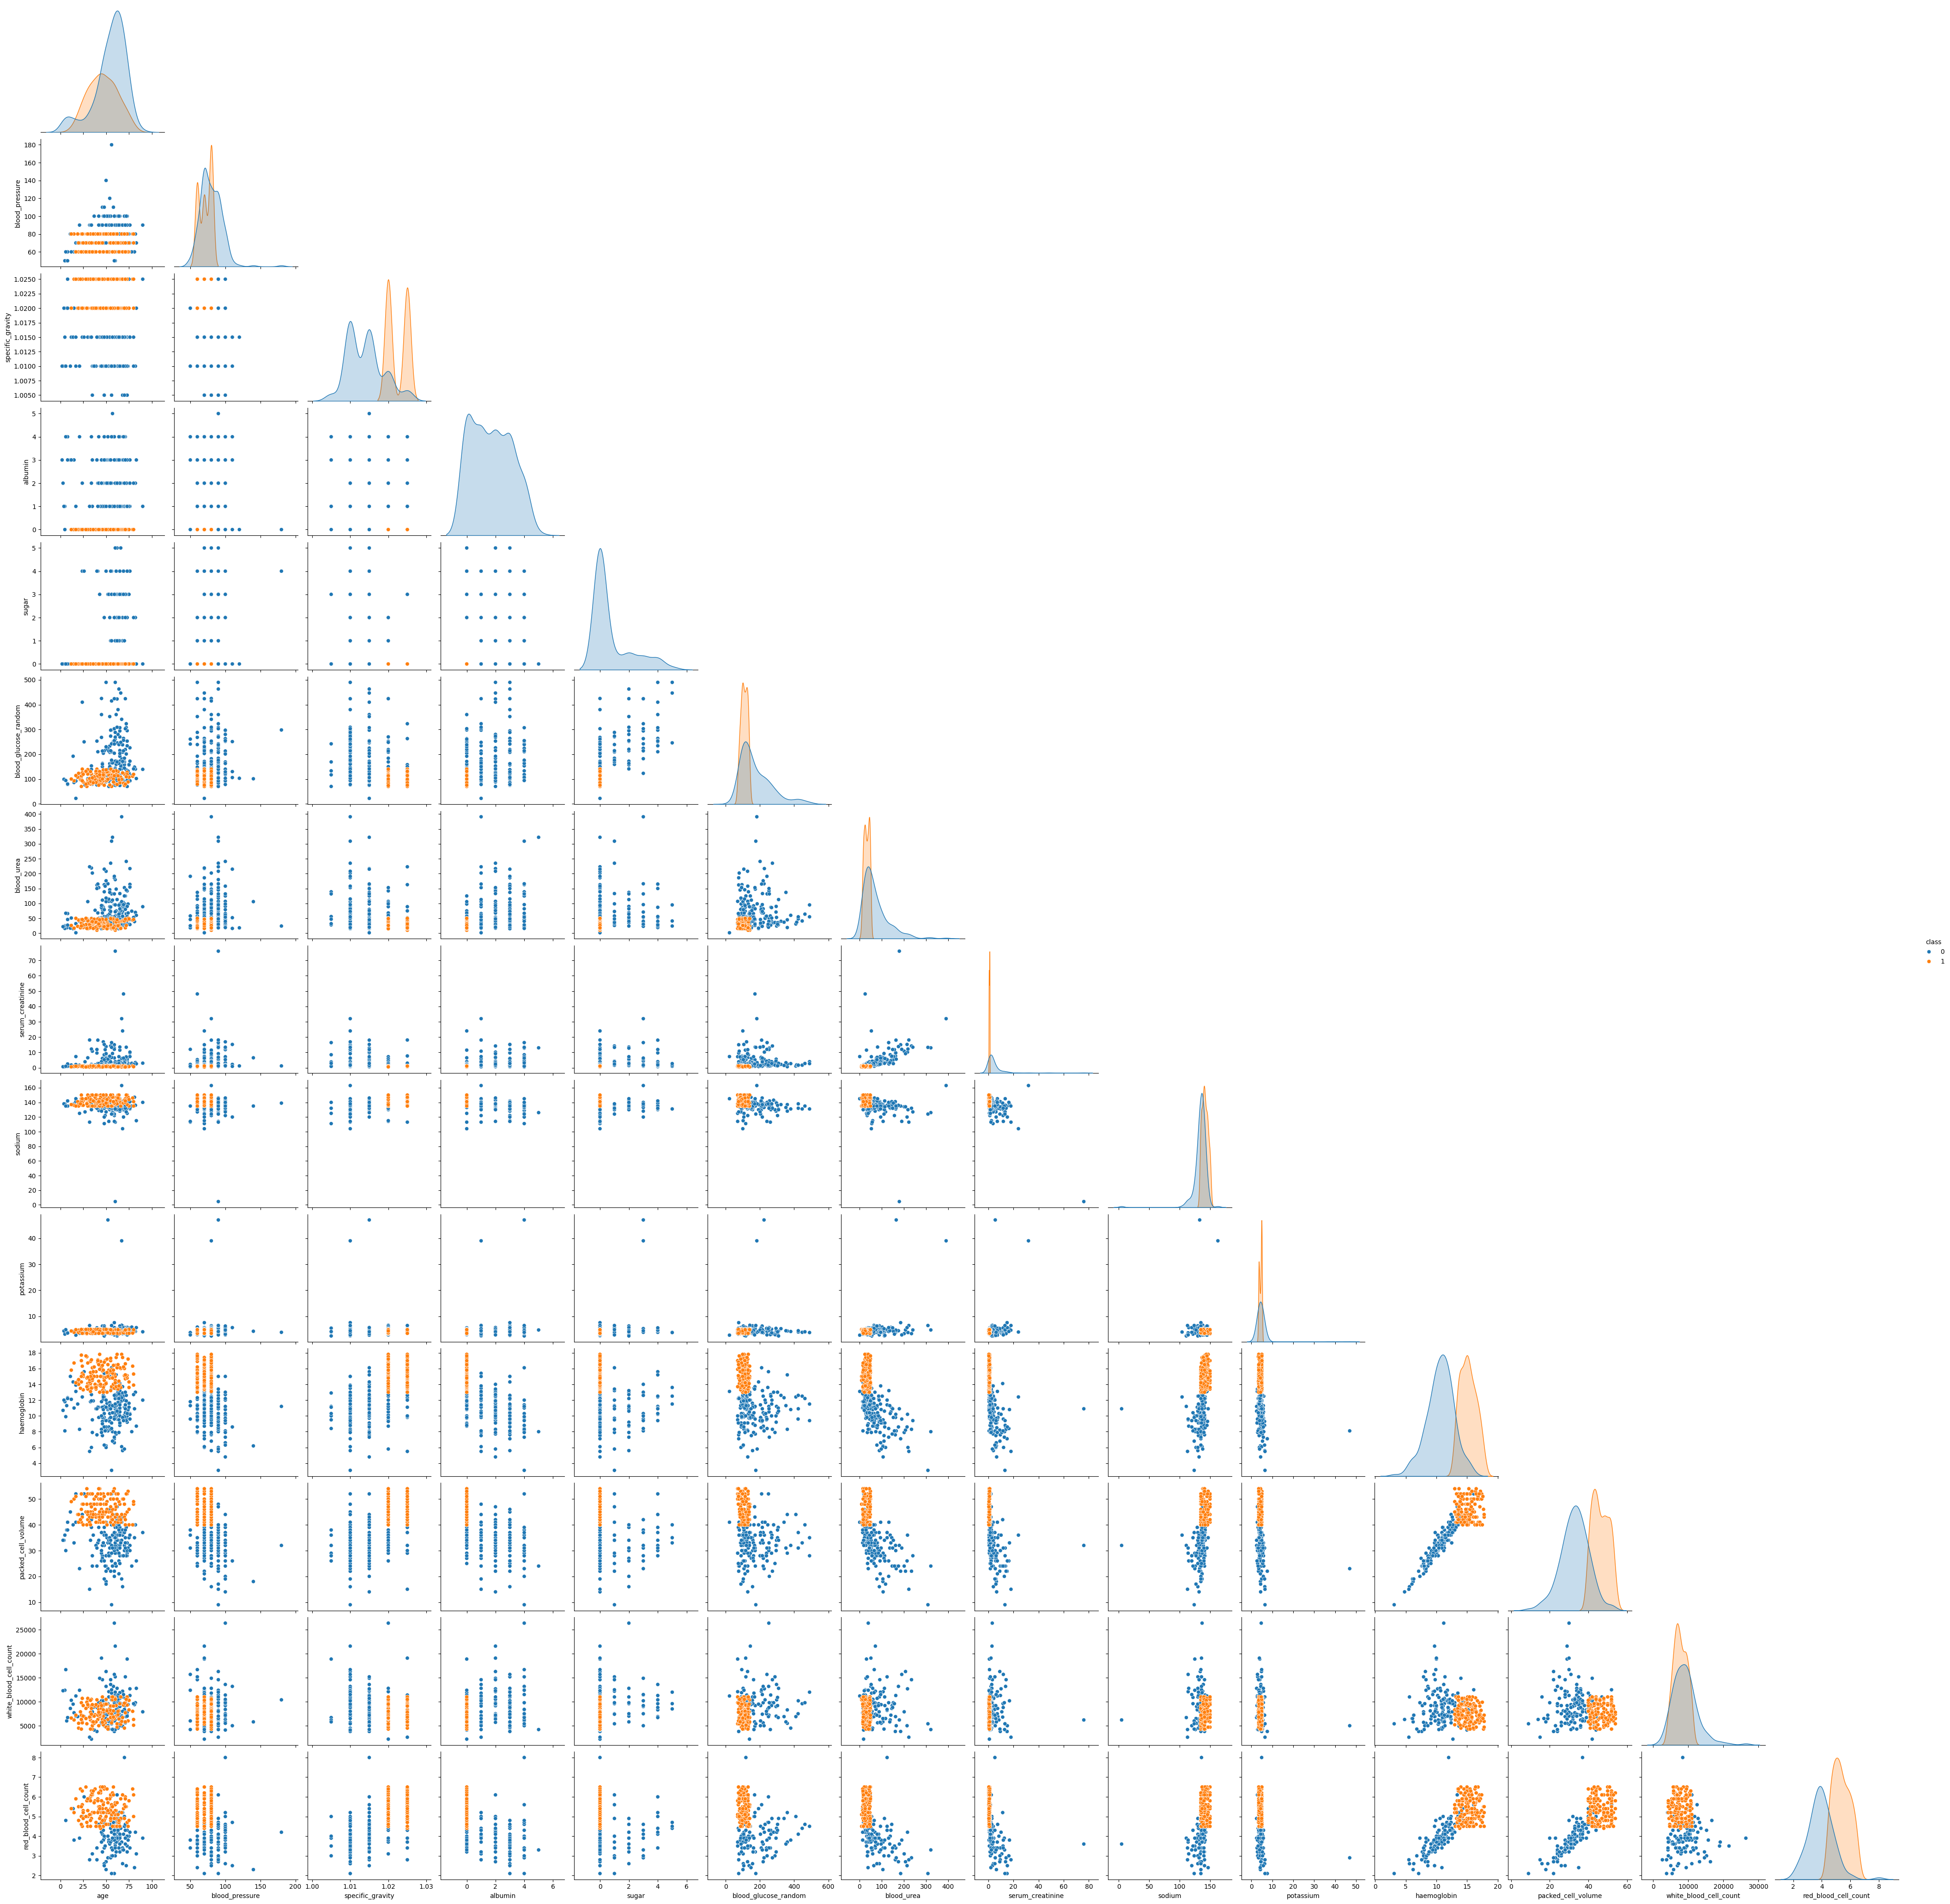

In [ ]:
# Plot the pairplot
sns.pairplot(df[num_cols + ['class']], hue='class', height=3, corner=True)

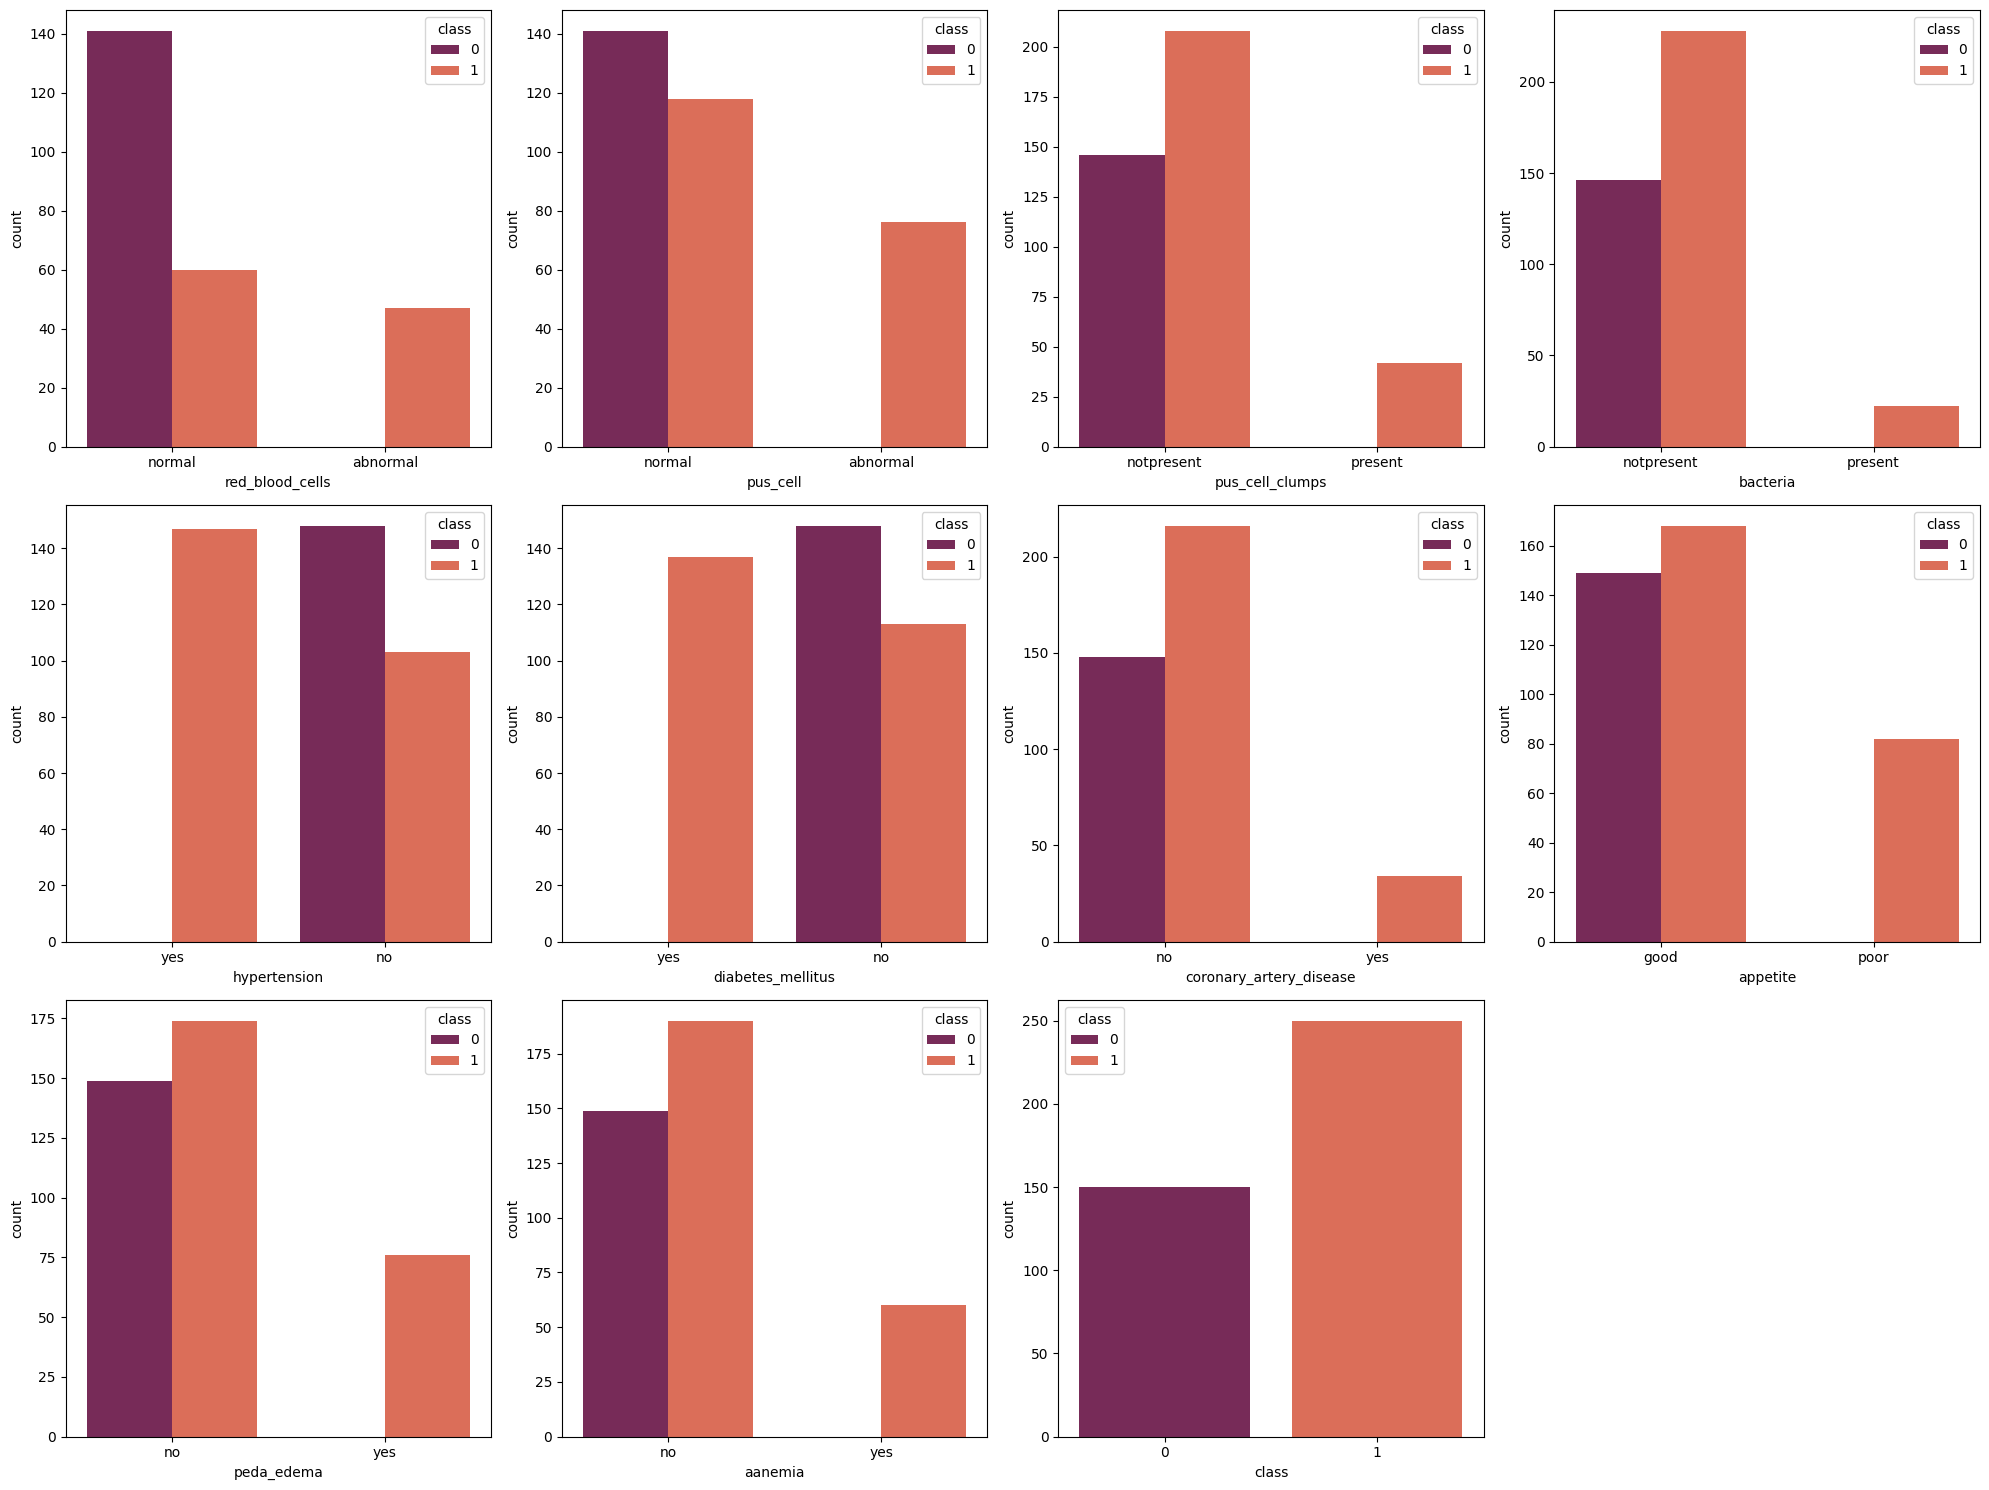

In [ ]:
plt.figure(figsize=(20, 15))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=column, data=df, palette='rocket', hue='class')
        plt.xlabel(column)
        plotnumber += 1

plt.tight_layout()
plt.show()


**Observations** <br>
* Healthy people do not have an abnormal count of red blood cells and pus cells. They lack pus cell clumps, bacteria and peda edema. They also don't have coronary artery disease, poor appetite and anaemia.
* People with chronic kidney disease have hypertension and diabetes mellitus.



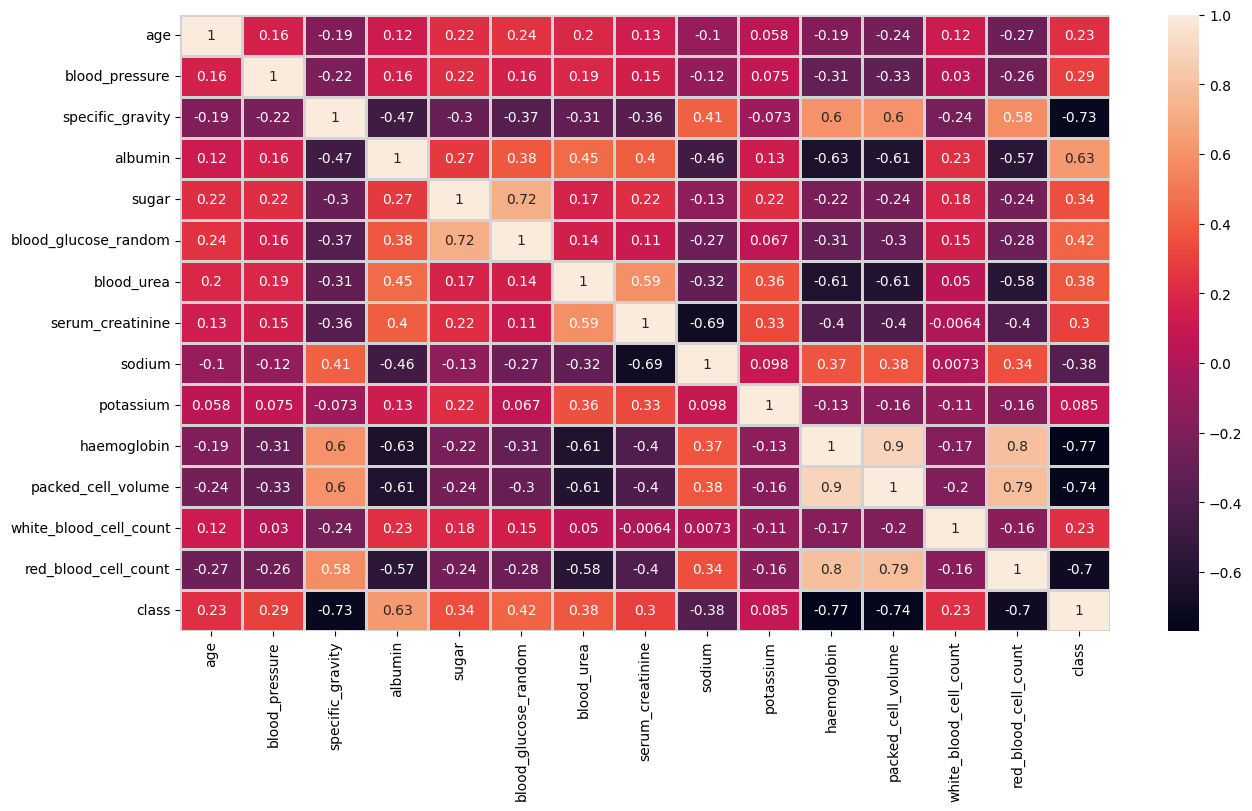

In [ ]:
# heatmap of numerical data

plt.figure(figsize = (15, 8))

sns.heatmap(df[num_cols + ['class']].corr(), annot = True, linewidths = 2)
plt.show()

#### Observations
Blood pressure, haemoglobin, packed cell volume, and red blood cell count have high negative correlation to chronic kidney disease. <br>
Albumin has high positive correlation to chronic kidney disease.

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Violin plot
fig = px.violin(df, y='red_blood_cell_count', x="class", color="class", box=True)
fig.show()

**Observation:** People who have chronic kidney disease tend to have a lower red blood cell count.

Text(0, 0.5, 'Density')

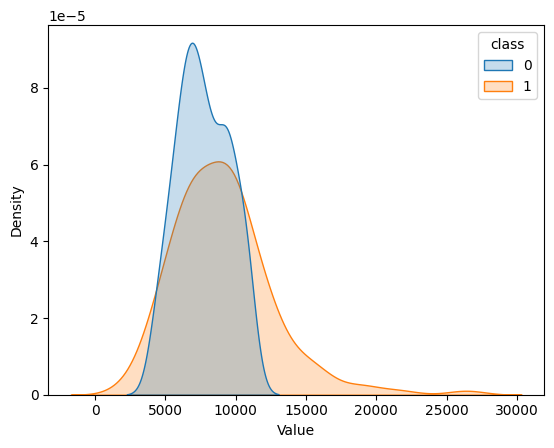

In [ ]:
sns.kdeplot(data=df, x='white_blood_cell_count', hue='class', fill=True)

# Add titles and labels
plt.xlabel("Value")
plt.ylabel("Density")

**Observation:** The large overlap between the plot along with peaks at almost the same value (~8000) indicates that white blood cell count is not the most appropriate feature to distinguish between people with and without chronic kidney disease. This is supported by the value of 0.23 for the correlation between white blood cell count and class.
However, there is a peak for healthy people at ~6000.

In [ ]:
# Create a scatter plot
fig = px.scatter(df, x='albumin', y='haemoglobin', color='class', title='Scatter Plot b/w albumin and haemoglobin',
                 labels={'x': 'albumin', 'y': 'haemoglobin'})
# Show the plot
fig.show()

**Observation:** Healthy people tend to have higher haemoglobin than people with chronic kidney disease. People with chronic kidney disease tend to have higher albumin levels.

In [ ]:
# Create a scatter plot
fig = px.scatter(df, x='packed_cell_volume', y='blood_urea', color='class', title='Scatter Plot b/w packed cell volume and urea',
                 labels={'x': 'packed cell volume', 'y': 'blood urea'})
# Show the plot
fig.show()

**Observation:** Healthy people have higher packed cell volume and lower blood urea, while people with chronic kidney disease have lower packed cell volume and higher amount of urea in their blood.

# Data Preprocessing

In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,152
red_blood_cell_count,131
white_blood_cell_count,106
potassium,88
sodium,87
packed_cell_volume,71
pus_cell,65
haemoglobin,52
sugar,49
specific_gravity,47


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df[df.isnull().any(axis=1)]

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35.0,7300.0,4.6,no,no,no,good,no,no,1
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4,yes,yes,no,good,yes,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,65.0,70.0,1.025,0.0,0.0,NaN,NaN,notpresent,notpresent,85.0,20.0,1.0,142.0,4.8,16.1,43.0,9600.0,4.5,no,no,no,good,no,no,0
363,67.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,99.0,40.0,0.5,NaN,NaN,17.8,44.0,5900.0,5.2,no,no,no,good,no,no,0
365,24.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,93.0,46.0,1.0,145.0,3.5,NaN,NaN,10700.0,6.3,no,no,no,good,no,no,0
378,71.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,NaN,NaN,0.9,140.0,4.8,15.2,42.0,7700.0,5.5,no,no,no,good,no,no,0


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
missing_counts = df.isnull().sum(axis=1)
# Create a DataFrame with row numbers and missing counts
missing_info = pd.DataFrame({
    'Row Number': df.index,
    'Missing Values': missing_counts
})

# Filter to show only rows with missing values
rows_with_missing = missing_info[missing_info['Missing Values'] > 0]
sorted_rows_with_missing = rows_with_missing.sort_values(by='Missing Values', ascending=False)
sorted_rows_with_missing

,Row Number,Missing Values
86,86,11
104,104,11
228,228,11
222,222,11
59,59,11
...,...,...
46,46,1
241,241,1
243,243,1
244,244,1


In [ ]:
# Filter out rows with 9 or more missing values
rows_to_drop = rows_with_missing[rows_with_missing['Missing Values'] >= 9]['Row Number']

# Drop these rows from the original dataframe
df = df.drop(rows_to_drop)

In [ ]:
df.isna().sum().sort_values(ascending = False)

,0
red_blood_cells,131
red_blood_cell_count,108
white_blood_cell_count,84
potassium,72
sodium,71
packed_cell_volume,49
pus_cell,47
blood_glucose_random,35
haemoglobin,35
sugar,32


In [ ]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

,0
red_blood_cells,131
pus_cell,47
pus_cell_clumps,4
bacteria,4
hypertension,2
diabetes_mellitus,2
coronary_artery_disease,2
appetite,1
peda_edema,1
aanemia,1


In [ ]:
# use random value imputation for features with many missing values
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum()) # removes any missing values from the column and randomly sample as many values as there are missing in the column
    random_sample.index = df[df[feature].isnull()].index #  assign the indices of the missing values in df[feature] to random_sample
    df.loc[df[feature].isnull(), feature] = random_sample # replace the missing values in df[feature] with the corresponding values from random_sample

In [ ]:
# use mode imputation for features with few missing values
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
random_impute_cols = ['red_blood_cells', 'pus_cell']
mode_impute_cols = list(set(cat_cols) - set(random_impute_cols))

In [ ]:
for col in random_impute_cols:
    random_value_imputation(col)

for col in mode_impute_cols:
    df[[col]] = mode_imputer.fit_transform(df[[col]])

In [ ]:
df[cat_cols].isnull().sum().sort_values(ascending = False)

,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0
hypertension,0
diabetes_mellitus,0
coronary_artery_disease,0
appetite,0
peda_edema,0
aanemia,0


In [ ]:
df[num_cols].isnull().sum().sort_values(ascending = False)

,0
red_blood_cell_count,108
white_blood_cell_count,84
potassium,72
sodium,71
packed_cell_volume,49
blood_glucose_random,35
haemoglobin,35
sugar,32
specific_gravity,31
albumin,31


In [ ]:
# Use mean imputer for numerical columns with few missing values
mean_imputer = SimpleImputer(strategy='mean')

# Use the same random value imputer for numerical columns with many missing values as well

In [ ]:
mean_impute_cols = ['age', 'blood_pressure', 'serum_creatinine', 'blood_urea']
random_impute_numcols = list(set(num_cols) - set(mean_impute_cols))

In [ ]:
for col in random_impute_numcols:
    random_value_imputation(col)

for col in mean_impute_cols:
    df[[col]] = mean_imputer.fit_transform(df[[col]])

In [ ]:
df[num_cols].isnull().sum().sort_values(ascending = False)

,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
blood_glucose_random,0
blood_urea,0
serum_creatinine,0
sodium,0
potassium,0


## Feature Encoding

In [ ]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} categories\n")

red_blood_cells has ['normal' 'abnormal'] categories

pus_cell has ['normal' 'abnormal'] categories

pus_cell_clumps has ['notpresent' 'present'] categories

bacteria has ['notpresent' 'present'] categories

hypertension has ['yes' 'no'] categories

diabetes_mellitus has ['yes' 'no'] categories

coronary_artery_disease has ['no' 'yes'] categories

appetite has ['good' 'poor'] categories

peda_edema has ['no' 'yes'] categories

aanemia has ['no' 'yes'] categories

class has [1 0] categories



In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,150.0,5.0,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,93.0,18.0,0.8,134.0,4.9,11.3,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,143.0,3.8,9.6,31.0,7500.0,2.5,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,135.0,4.3,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,1


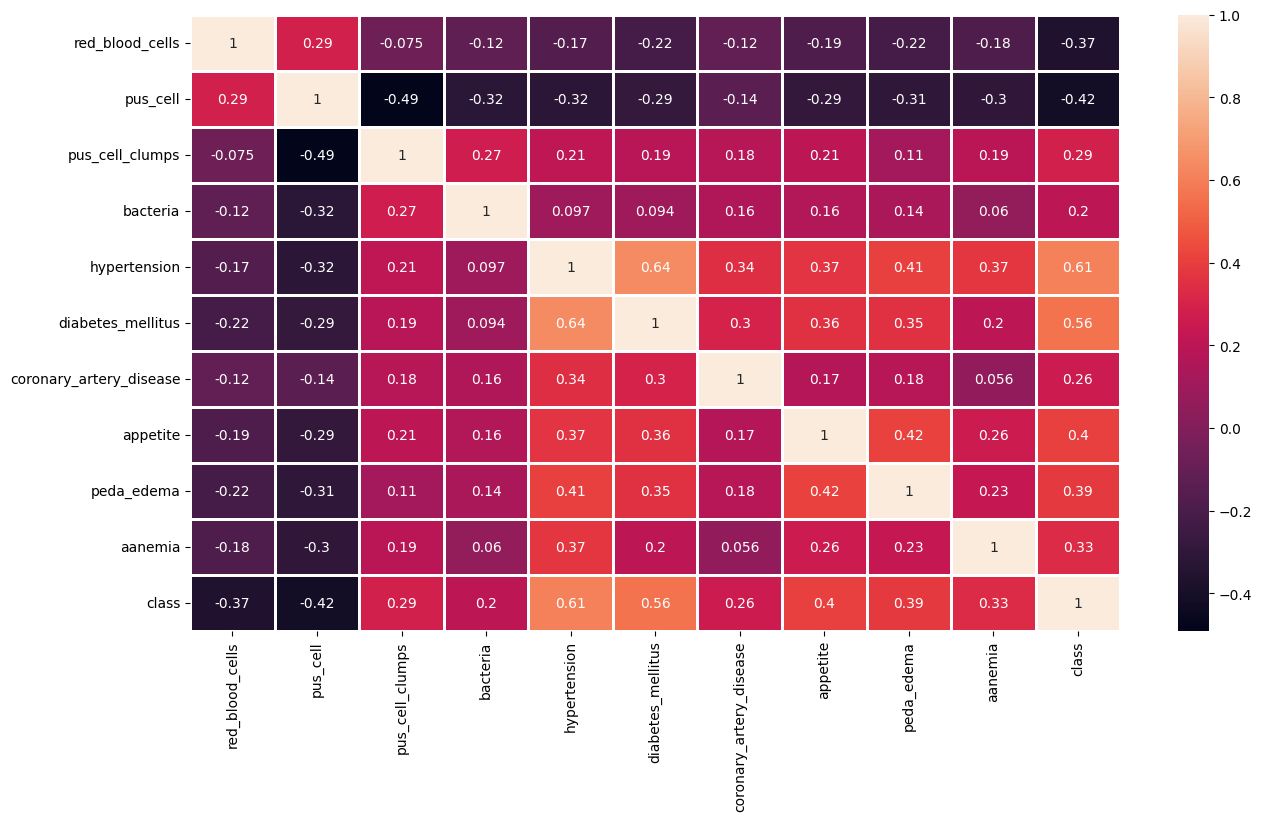

In [ ]:
# heatmap of categorical data

plt.figure(figsize = (15, 8))

sns.heatmap(df[cat_cols].corr(), annot = True, linewidths = 2)
plt.show()

## Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Model Building

In [ ]:
X = df[[col for col in df.columns if col != 'class']] # independent features
y = df['class'] # dependant variable

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

cnf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cnf_matrix)
print()
print('Classification Report')
print(classification_report(y_test, y_pred))

print('Accuracy: ',accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('f1 score: ', f1)
print('ROC AUC Curve: ', auc)

Confusion Matrix
[[43  0]
 [ 1 70]]

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       1.00      0.99      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

Accuracy:  0.9912280701754386
Precision:  1.0
Recall:  0.9859154929577465
f1 score:  0.9929078014184397
ROC AUC Curve:  0.9929577464788732
